### MY470 Computer Programming
# Useful Python Modules and Libraries
### Week 11 Lab

## Working with Dates: `datetime`

https://docs.python.org/3/library/datetime.html

In [8]:
from datetime import datetime, timedelta


# Transform string into datetime object
string = '2002-02-25 15:51:15'
# Take a string and convert it into a datetime object.
dt = datetime.strptime(string, "%Y-%m-%d %H:%M:%S") 
# Take a datetime object and convert it into a string.
stringi = datetime.strftime(dt, "%Y-%m-%d %H:%M:%S") 
print(type(dt), type(stringi), dt)



# Get difference between two dates

day1 = dt - datetime(2002, 2, 24, 15, 51, 15)
print(type(day1), day1)

day2 = timedelta(hours=24)
print(type(day2), day2)

# You can combine time deltas with datetimes:

weeks = timedelta(weeks = 7)
print(dt + weeks)

<class 'datetime.datetime'> <class 'str'> 2002-02-25 15:51:15
<class 'datetime.timedelta'> 1 day, 0:00:00
<class 'datetime.timedelta'> 1 day, 0:00:00
2002-04-15 15:51:15


## Saving Python Objects to Disk: `pickle`

https://docs.python.org/3/library/pickle.html

In [9]:
import pickle

# Note: Open files in binary mode

# Pickle Python object
obj = {1:'a', 2:'b'}

# We give the object a file name (dict_pickle), that we write (wb), and we save it.
with open ('dict_pickle', 'wb') as fw:
    pickle.dump(obj, fw)

# Unpickle saved Python object
with open ('dict_pickle', 'rb') as fr:
    obj_retrieved = pickle.load(fr)
    
print(type(obj_retrieved), obj_retrieved)

# Pickling files store the data in binary mode, that's why it usees wb and rb.
# Normally, when using Python you would use 'w' or 'r'.

# Pickle is also really useful because normally, if you dumped a file into a .txt file
# you would need to parse the datetimes as datetimes again (because they would
# be read as strings). With pickle the datetime type of the variable is stored. 

<class 'dict'> {1: 'a', 2: 'b'}


In [31]:
# Exercise 1: Read the file enwiki_2002_sample.txt and save the data 
# in a variable as a list. Make sure all data are in the correct
# data type, e.g., save dates as datetime objects.
# Print the first 3 elements of the list to confirm.

# Another way to do it is with for line in open (for each line in the handle).
data = []
with open('enwiki_2002_sample.txt', 'r') as f:
    f.readline()
    for line in f.readlines():
        #if not line.startswith('title'): 
            # Another way to avoid the header is readline before.
        title, date, int1, int2, username =  line.rstrip().split('\t')
        data.append([title, datetime.strptime(date, "%Y-%m-%d %H:%M:%S"), int(int1), int(int2), username])
        
print(data[:3])    

[['Industrial_revolution ', datetime.datetime(2002, 2, 25, 15, 51, 15), 0, 2, 'Conversion_script'], ['Industrial_revolution ', datetime.datetime(2001, 8, 17, 14, 14, 23), 0, 1, 'Koyaanis_Qatsi'], ['Spitfire_(disambiguation) ', datetime.datetime(2002, 6, 20, 13, 0, 32), 0, 2, 'Uriyan']]


In [35]:
# Exercise 2: Pickle the list variable from exercise 1. 
# Then load it back in memory from the pickle.
with open('wiki_example', 'wb') as fw:
    pickle.dump(data, fw)
    
with open('wiki_example', 'rb') as rw:
    data_wiki = pickle.load(rw)
    
data_wiki[:3]
# As expected, it preserves the data types. 

[['Industrial_revolution ',
  datetime.datetime(2002, 2, 25, 15, 51, 15),
  0,
  2,
  'Conversion_script'],
 ['Industrial_revolution ',
  datetime.datetime(2001, 8, 17, 14, 14, 23),
  0,
  1,
  'Koyaanis_Qatsi'],
 ['Spitfire_(disambiguation) ',
  datetime.datetime(2002, 6, 20, 13, 0, 32),
  0,
  2,
  'Uriyan']]

# Useful Libraries for Computational Social Science and Social Data Science

* NumPy
* Pandas
* StatsModels
* NetworkX
* Scikit-learn
* Matplotlib (introduced in week 10)

## Working with Arrays and Matrices: `numpy`

![NumPy](figs/numpy.png "NumPy")

* Python library for operating with large multi-dimensional arrays and matrices
* Partially written in C, so optimized for performance
* Offers fast numerical computations and high-level math functions
* Provides functionality similar to MATLAB (especially together with `scipy` and `matplotlib`)

## NumPy Arrays

* Multi-dimensional: 0 (scalar), 1 (vector), 2 (matrix), 3 (e.g., image), ...
* Dense: all elements exist
* Homogeneous: all elements are of the same type

In [36]:
import numpy as np

# This is a matrix (2d array).
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a)
print(type(a))
print(a.ndim, a.shape, a.dtype) # Notice the lack of () - these are properties, not methods

[[1 2 3]
 [4 5 6]]
<class 'numpy.ndarray'>
2 (2, 3) int64


## Creating Arrays

In [38]:
a = np.zeros((3, 3))  # create a 3x3 array of float zeros
a.shape

(3, 3)

In [39]:
# NumPy is implemented in C and supports more numerical types than Python
# See: https://docs.scipy.org/doc/numpy/user/basics.types.html
a = np.ones((4, 3), dtype = np.int16)  # create a 4x3 array of integer ones where integer type (-32768 to 32767)
a

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int16)

In [40]:
r = np.random.random((2, 4))  # create a 2x4 array of floats drawn uniformly from [0., 1.)
r

array([[0.15750374, 0.07321732, 0.2198178 , 0.2908212 ],
       [0.19800874, 0.70640949, 0.65318877, 0.30708126]])

## Reshaping and Transposing Arrays

In [41]:
a = np.arange(10)  # Creates an array of numbers from 0 to input (like Python range() but step could be non-integer)
print(a)
a = a.reshape(5, 2) # reshape to 5x2
print(a)

[0 1 2 3 4 5 6 7 8 9]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [43]:
at = np.transpose(a)  # reverse dimensions of a
at

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

## Indexing Arrays

In [44]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a[0, -1])  # first row, last column
print(a[1, :])  # entire second row 
c = np.array([[True, True, False], [False, False, True]]) # fancy indexing
print(a[c])  # elements of a that are True in c 

3
[4 5 6]
[1 2 6]


## Mathematical Operations with Arrays

* Arithmetic operations are element-wise

In [47]:
b = np.array([[10, 20, 30], [40, 50, 60]])
print(a * b)
print(a + 1)  # arrays must be same shape (although you can add scalars)

print([1, 2, 3] + [10, 20, 30]) # in comparison, lists get concatenated

[[ 10  40  90]
 [160 250 360]]
[[2 3 4]
 [5 6 7]]
[1, 2, 3, 10, 20, 30]


In [35]:
print(np.exp(a))
print(np.sqrt(b))

[[   2.71828183    7.3890561    20.08553692]
 [  54.59815003  148.4131591   403.42879349]]
[[ 3.16227766  4.47213595  5.47722558]
 [ 6.32455532  7.07106781  7.74596669]]


* Logical operations return a Boolean array

In [16]:
b > 15

array([[False,  True,  True],
       [ True,  True,  True]], dtype=bool)

* Matrix multiplication with `@`

In [38]:
a @ np.transpose(b)

array([[140, 320],
       [320, 770]])

## Working with DataFrames: `pandas`

![Pandas](figs/pandas.png "Pandas")

* Python library for data manipulation and analysis 
    * The name is derived from **pan**el **da**ta = **pandas**
    * Partially written in C, so optimized for performance
* Key features
    * DataFrame object to hold and manipulate data
    * Read from and write in multiple file formats
    * Fancy indexing (including hierarchical)
    * Operations to handle missing data
    * Operations to slice, subset, split, reshape, pivot, merge, and join data sets

## `DataFrame`

* Primary `pandas` object
* 2-d heterogeneous tabular data structure with axes labels (rows and columns)
* like a `dict` for lists (more precisely, `pd.Series`)

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Create DataFrame from dictionary
d = {'Col1': [1, 2, 3], 'Col2': ['a', 'b', np.nan]}
df1 = pd.DataFrame(data=d)
df1

,Col1,Col2
0,1,a
1,2,b
2,3,NaN


In [4]:
# Create DataFrame from list or array
df2 = pd.DataFrame(data=[[1, 'a'], [2, 'b'], [3, np.nan]], 
                  index=['Row1', 'Row2', 'Row3'], columns=['Col1', 'Col2'])
print(df2)


      Col1 Col2
Row1     1    a
Row2     2    b
Row3     3  NaN


## Importing and Viewing Data

In [3]:
# Data source: https://vincentarelbundock.github.io/Rdatasets/doc/carData/States.html

df3 = pd.read_csv('States.csv')
print(df3.head())

  state region    pop  SATV  SATM  percent  dollars  pay
0    AL    ESC   4041   470   514        8    3.648   27
1    AK    PAC    550   438   476       42    7.887   43
2    AZ    MTN   3665   445   497       25    4.231   30
3    AR    WSC   2351   470   511        6    3.334   23
4    CA    PAC  29760   419   484       45    4.826   39


In [26]:
print(df3.columns)
print(df3.dtypes)
print(df3.describe())

Index(['state', 'region', 'pop', 'SATV', 'SATM', 'percent', 'dollars', 'pay'], dtype='object')
state       object
region      object
pop          int64
SATV         int64
SATM         int64
percent      int64
dollars    float64
pay          int64
dtype: object
                pop        SATV        SATM    percent    dollars        pay
count     51.000000   51.000000   51.000000  51.000000  51.000000  51.000000
mean    4876.647059  448.156863  497.392157  33.745098   5.175490  30.941176
std     5439.202691   30.821014   34.568817  24.073922   1.376166   5.308151
min      454.000000  397.000000  437.000000   4.000000   2.993000  22.000000
25%     1215.000000  422.500000  470.000000  11.500000   4.354000  27.500000
50%     3294.000000  443.000000  490.000000  25.000000   5.045000  30.000000
75%     5780.000000  474.500000  522.500000  57.500000   5.689500  33.500000
max    29760.000000  511.000000  577.000000  74.000000   9.159000  43.000000


## Selecting Data

In [27]:
df3.state  # Select column; equivalent to df3['state']

0     AL
1     AK
2     AZ
3     AR
4     CA
5     CO
6     CN
7     DE
8     DC
9     FL
10    GA
11    HI
12    ID
13    IL
14    IN
15    IA
16    KS
17    KY
18    LA
19    ME
20    MD
21    MA
22    MI
23    MN
24    MS
25    MO
26    MT
27    NE
28    NV
29    NH
30    NJ
31    NM
32    NY
33    NC
34    ND
35    OH
36    OK
37    OR
38    PA
39    RI
40    SC
41    SD
42    TN
43    TX
44    UT
45    VT
46    VA
47    WA
48    WV
49    WI
50    WY
Name: state, dtype: object

In [28]:
df3[:3] # Select data by rows

,state,region,pop,SATV,SATM,percent,dollars,pay
0,AL,ESC,4041,470,514,8,3.648,27
1,AK,PAC,550,438,476,42,7.887,43
2,AZ,MTN,3665,445,497,25,4.231,30


In [29]:
df3[df3['pop'] > 10000]  # Select data by column value

,state,region,pop,SATV,SATM,percent,dollars,pay
4,CA,PAC,29760,419,484,45,4.826,39
9,FL,SA,12938,418,466,44,5.154,30
13,IL,ENC,11431,466,528,16,5.062,34
32,NY,MA,17990,412,470,70,8.500,42
35,OH,ENC,10847,450,499,22,5.639,32
38,PA,MA,11882,420,463,64,6.534,36
43,TX,WSC,16987,413,461,42,4.238,28


## Grouping

In [30]:
# Add a column that indicates whether state performed above median on SAT
df3['SAT'] = df3['SATV'] + df3['SATM']
df3['above-avg'] = df3['SAT'] > df3['SAT'].median()
df3.head()

,state,region,pop,SATV,SATM,percent,dollars,pay,SAT,above-avg
0,AL,ESC,4041,470,514,8,3.648,27,984,True
1,AK,PAC,550,438,476,42,7.887,43,914,False
2,AZ,MTN,3665,445,497,25,4.231,30,942,True
3,AR,WSC,2351,470,511,6,3.334,23,981,True
4,CA,PAC,29760,419,484,45,4.826,39,903,False


In [31]:
# Get mean indicators by SAT performance
df3.groupby('above-avg').mean()

,pop,SATV,SATM,percent,dollars,pay,SAT
above-avg,,,,,,,
False,6047.461538,422.076923,468.423077,54.615385,5.940538,33.807692,890.5
True,3659.000000,475.280000,527.520000,12.040000,4.379840,27.960000,1002.8


## Estimating Statistical Models: `statsmodels`

![Statsmodels](figs/statsmodels_hybi_banner.png "Statsmodels")

* Python library for estimating statistical models and conducting statistical tests
* Uses `numpy` for estimation
* Integrates with `pandas` for data handling
* Provides an `R`-like formula interface

## Typical Steps

1. Get data (`pandas`)
* Inspect data (`pandas`, `matplotlib`)
* Define and fit model (`statsmodels`)
* Inspect model results (`statsmodels`, `matplotlib`)
* Inspect model fit (`statsmodels`, `matplotlib`)

## OLS Example: Inspect Data

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Get data
df = pd.read_csv('States.csv')
print(df.head())

  state region    pop  SATV  SATM  percent  dollars  pay
0    AL    ESC   4041   470   514        8    3.648   27
1    AK    PAC    550   438   476       42    7.887   43
2    AZ    MTN   3665   445   497       25    4.231   30
3    AR    WSC   2351   470   511        6    3.334   23
4    CA    PAC  29760   419   484       45    4.826   39


In [32]:
# Inspect data
print(df.describe())

                pop        SATV        SATM    percent    dollars        pay
count     51.000000   51.000000   51.000000  51.000000  51.000000  51.000000
mean    4876.647059  448.156863  497.392157  33.745098   5.175490  30.941176
std     5439.202691   30.821014   34.568817  24.073922   1.376166   5.308151
min      454.000000  397.000000  437.000000   4.000000   2.993000  22.000000
25%     1215.000000  422.500000  470.000000  11.500000   4.354000  27.500000
50%     3294.000000  443.000000  490.000000  25.000000   5.045000  30.000000
75%     5780.000000  474.500000  522.500000  57.500000   5.689500  33.500000
max    29760.000000  511.000000  577.000000  74.000000   9.159000  43.000000


## OLS Example: Fit Model

In [31]:
# Define regression model 
model = smf.ols('SATV ~ percent + dollars + pay + np.log(pop)', data=df)
# Fit model
results = model.fit()
# Inspect results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   SATV   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     41.35
Date:                Tue, 11 Sep 2018   Prob (F-statistic):           1.11e-14
Time:                        10:39:43   Log-Likelihood:                -207.81
No. Observations:                  51   AIC:                             425.6
Df Residuals:                      46   BIC:                             435.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     508.6092     19.627     25.914      

## Analyzing Networks: `networkx`

![NetworkX](figs/networkx.png "NetworkX")

* Library for studying networks
* The major data structures are of the type "dictionary of dictionaries"
* Capabilities:
    * Estimate common network measures
    * Construct random networks
    * Visualize networks
    * Convert networks to and from different formats

## Creating Networks

In [5]:
import networkx as nx

# Create an empty network
G = nx.Graph()  
# Add nodes to network
G.add_node(1)
G.add_nodes_from([2,3])
print(G.nodes())
G.nodes()

[1, 2, 3]


NodeView((1, 2, 3))

In [6]:
# Add edges to network (nodes are automatically added if they don't exist already)
G.add_edge(1, 2)
G.add_edges_from([(2, 3), (1, 3), (1, 4)])
print(G.edges())
print(G.nodes())

[(1, 2), (1, 3), (1, 4), (2, 3)]
[1, 2, 3, 4]


## Node and Edge Attributes

In [7]:
# Add/modify node attributes
G.nodes[1]['name'] = 'Anna'
G.add_node(5, name='Elliot')
G.add_nodes_from([6, 7], name='Fathima')
G.nodes.data()

NodeDataView({1: {'name': 'Anna'}, 2: {}, 3: {}, 4: {}, 5: {'name': 'Elliot'}, 6: {'name': 'Fathima'}, 7: {'name': 'Fathima'}})

In [8]:
# Add/modify edge attributes
G.add_edge(5, 6, weight=2)
G.add_edges_from([(1, 2), (1, 3)], weight=1)
G[1][2]['weight'] = 1.7
G.edges[2, 3]['weight'] = 1.5
G.edges.data()

EdgeDataView([(1, 2, {'weight': 1.7}), (1, 3, {'weight': 1}), (1, 4, {}), (2, 3, {'weight': 1.5}), (5, 6, {'weight': 2})])

## Analyzing Networks

In [9]:
# Estimate node degrees -- returns a DegreeView object capable of iterating (node, degree) pairs
G.degree()

DegreeView({1: 3, 2: 2, 3: 2, 4: 1, 5: 1, 6: 1, 7: 0})

In [10]:
# Estimate node clustering
# The method returns dictionary -- it's good example about the importance of consistency!
nx.clustering(G)

{1: 0.3333333333333333, 2: 1.0, 3: 1.0, 4: 0, 5: 0, 6: 0, 7: 0}

In [11]:
# Identify the connected subcomponents in the network -- returns a generator!
nx.connected_components(G)

<generator object connected_components at 0x7fd4993e52a0>

* Despite these inconsistencies, `networkx` is a powerful library for network analysis (although not so much for visualization)
* When in doubt or confused, simply consult the documentation!

## Machine Learning: `scikit-learn`

![Scikit-learn](figs/scikitlearn.png "Scikit-learn")

* Machine-learning library for Python
* Includes various algorithms
    * Supervised learning
        * Classification
        * Regression
    * Unsupervised learning
        * Clustering
        * Dimensionality reduction
* Includes classes for model evaluation and model selection
* Integrates with `numpy`

## The `scikit-learn` Estimators

The estimator is an object (instance of a class) that learns from data. 

Unsupervised learning estimators have the `fit` method:
* `fit(data)`

Supervised learning estimators have `fit` and `predict` methods:
* `fit(X, y)` to known data
* `predict(T)` unknown data


## Plotting: `matplotlib`

![Matplotlib](figs/matplotlib.png "Matplotlib")

* The most used Python library for 2D graphics 
* To quickly and easily generate figures, use the procedural interface provided by pyplot 
    * **`pyplot`** provides functions that make `matplotlib` work like MATLAB 
* To achieve more customization and control, use the object-oriented approach with the **`Axes`** class


## Typical Steps for Plotting with `pyplot`

### 1. Import `pyplot` 
* **`import matplotlib.pyplot as plt`**

\*Set global parameters
* `import matplotlib as mpl`
* `mpl.rcParams['font.family'] = 'sans-serif'`
    
\*Define figure and subplots
* `plt.figure(*figsize)`
* `plt.subplot(nrow, ncol, plotnum)`
    
### 2. Plot with plot parameters
* **`plt.plot(x, y, *c, *lw, *label)`**
* `plt.scatter(x, y, *s, *c, *marker, *alpha, *label)`
* `plt.boxplot(x, *positions, *widths)`
* `plt.hist(x, *bins, *color)`
* `plt.bar(x, y, *width, *color, *yerr)`

\*Adjust specific figure parameters
* `plt.xlim(xmin, xmax)`
* `plt.xticks(locs, *labels)`

\*Add annotations    
* `plt.xlabel(s)`    
* `plt.title(s)`
* `plt.legend(*loc, *ncol)`
* `plt.text(x, y, s, *fontsize)`
    
### 3. Show or save figure
* **`plt.show()`**
* `plt.savefig(fname)`


## Simple Plotting

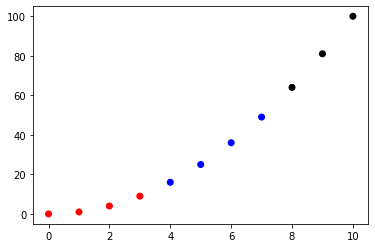

In [58]:
import matplotlib.pyplot as plt

x = [i for i in range(11)]
c = ['r']*4 + ['b']*4 + ['k']*3
y = [i**2 for i in x]

plt.scatter(x, y, c= c)  # 'r--' is an optional format string indicating color and line type
plt.show()

## Making Plots Prettier

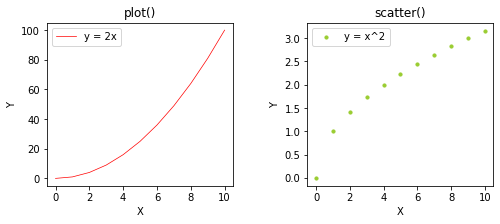

In [2]:
import matplotlib.pyplot as plt

x = [i for i in range(11)]
y1 = [i**2 for i in x]
y2 = [i**0.5 for i in x]

fig = plt.figure(figsize=(8, 3))

# This is used to increase the space between both subplots. 
fig.subplots_adjust(wspace=0.4)

plt.subplot(1, 2, 1)
plt.plot(x, y1, c='r', lw=0.7, label='y = 2x')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('plot()')

plt.subplot(1, 2, 2)
plt.scatter(x, y2, c='yellowgreen', s=10, label='y = x^2')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('scatter()')

plt.savefig('figs/pyplot_demo.pdf')
plt.show()

In [59]:
import plotnine